In [22]:
#Import Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset["train"].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) 

In [23]:
#Filter for US Data Analyst roles
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()

In [24]:
df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month

In [25]:
df_DA_US_explode = df_DA_US.explode('job_skills')

In [26]:
df_DA_US_pivot = df_DA_US_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()
df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_US_pivot = df_DA_US_pivot.drop('Total')

In [27]:
# Quero o grafico de percentuais
# Primeiro precisamos calcular os percentuais

DA_totals = df_DA_US.groupby('job_posted_month_no').size()
df_DA_US_percent = df_DA_US_pivot.div(DA_totals/100,axis=0)

In [28]:
#Change month number to month name
df_DA_US_percent = df_DA_US_percent.reset_index()
df_DA_US_percent['job_posted_month'] = df_DA_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_US_percent = df_DA_US_percent.set_index('job_posted_month')
df_DA_US_percent = df_DA_US_percent.drop(columns = 'job_posted_month_no')

In [29]:
import seaborn as sns

In [48]:
df_plot.iloc[-1,0:5]
df_plot.iloc[-1,3]


27.041970344307614

In [49]:
df_plot.columns[3]

'python'

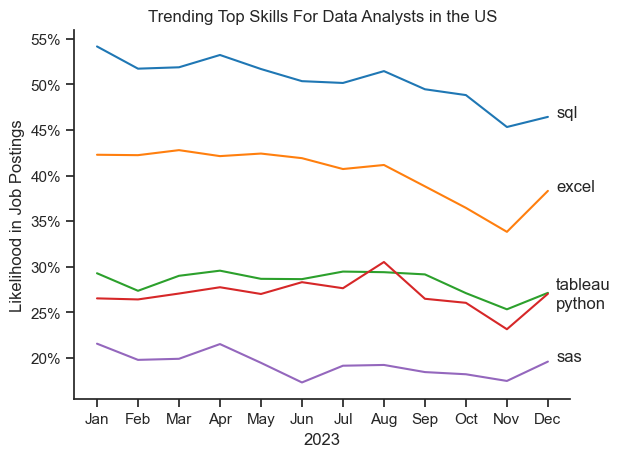

In [57]:
#Plot top 5 skills

df_plot = df_DA_US_percent.iloc[:, :5]
sns.lineplot(data = df_plot, dashes=False, palette = 'tab10')

sns.set_theme(style='ticks')
sns.despine()   # remove the outer board
plt.title('Trending Top Skills For Data Analysts in the US')
plt.xlabel('2023')
plt.ylabel('Likelihood in Job Postings')
plt.legend().remove()


from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in [0,1,4]:
    plt.text(11.2, df_plot.iloc[-1,i], df_plot.columns[i])

plt.text(11.2, 27.5, df_plot.columns[2])
plt.text(11.2, 25.5, df_plot.columns[3])

plt.show()
